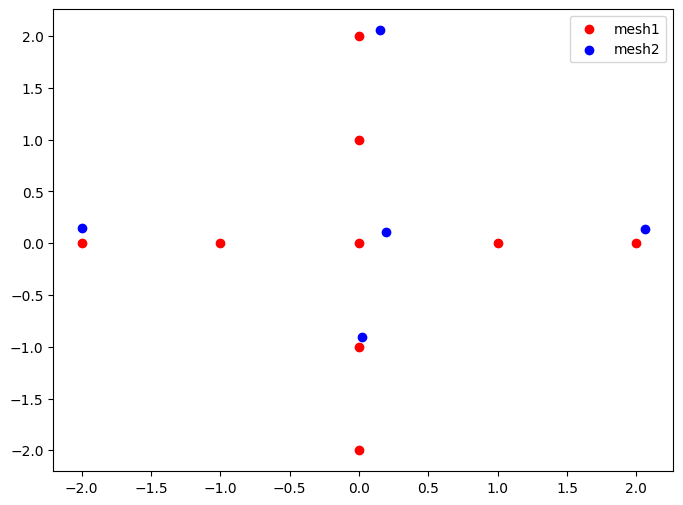

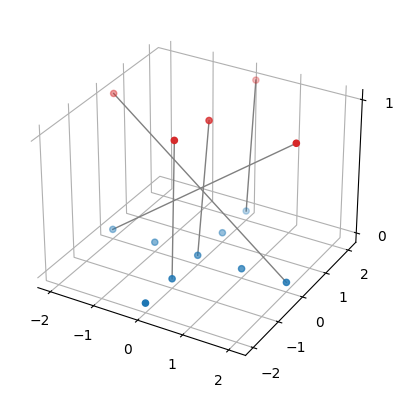

In [15]:
import numpy as np
import matplotlib.pylab as plt
from scipy.spatial.distance import cdist
import sgw

# Create a mesh of points
mesh1 = np.array([[0, 0], [2, 0], [-2, 0], [0, 2], [0, -2],[1, 0],[-1, 0],[0, 1],[0, -1]])
# mesh1 = mesh1 + np.random.rand(*mesh1.shape) * 3e-1
mesh2 = np.array([[0, 0, 0], [2, 0, 0], [-2, 0, 0], [0, 2, 0], [0, -1, 0]])
mesh2 = mesh2  + 2e-1 * np.random.rand(*mesh2.shape)
# mesh2 = mesh2 + np.random.rand(*mesh2.shape) * 3e-1

plt.figure(figsize=(8, 6))
plt.scatter(mesh1[:, 0], mesh1[:, 1], color='red', label='mesh1')
plt.scatter(mesh2[:, 0], mesh2[:, 1], color='blue', label='mesh2')
plt.legend()
plt.show()


# Compute the distance matrix of the random mesh
C1 = cdist(mesh1, mesh1)
C2 = cdist(mesh2, mesh2)
      

P = sgw.supervised_gromov_wasserstein(C1, C2, nitermax=200, threshold=0.5)




def plot_mapping(P,X_1,X_2, thresh=None, linewidth=1):

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    
    ax.scatter3D(X_1[:,0], X_1[:,1], 0, c='tab:blue')
    ax.scatter3D(X_2[:,0], X_2[:,1], 1, c='tab:red')
    ax.set_title('sGW: tau=' + str(tau) + ' threshold = ' +str(threshold))
    
    for i in range(P.shape[1]):
        if P[:,i].sum() < thresh: continue
        j = np.argmax(P[:,i])
        ax.plot3D([X_1[j,0], X_2[i,0]],[X_1[j,1], X_2[i,1]],[0,1],c='gray', linewidth=linewidth)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.set_zticks([0, 1])
    
plot_mapping(P, mesh1, mesh2, thresh=0.00000001)
plt.savefig('./coupling_cross_cross.pdf')    


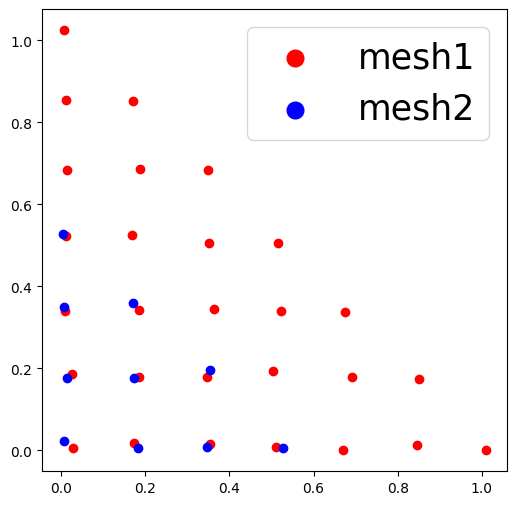

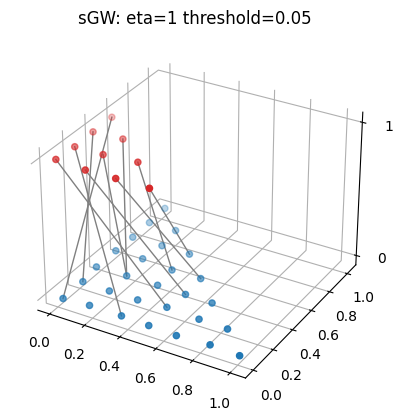

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.spatial.distance import cdist
import sgw


# create two triangles
N = 6
x = np.linspace(0, 1, N + 1)
y = x
xx, yy = np.meshgrid(x, y)
ind_temp = (xx + yy <= 1)
xx_temp = xx[ind_temp]
yy_temp = yy[ind_temp]
X = np.column_stack((xx_temp, yy_temp))
n = X.shape[0]

mesh1 = X  + 3e-2 * np.random.rand(*X.shape)

N = 3
x = np.linspace(0, 0.5, N + 1)
y = x
xx, yy = np.meshgrid(x, y)
ind_temp = (xx + yy <= 0.5)
xx_temp = xx[ind_temp]
yy_temp = yy[ind_temp]
Y = np.column_stack((xx_temp, yy_temp))
m = Y.shape[0]

mesh2 = Y  + 3e-2 * np.random.rand(*Y.shape)

plt.figure(figsize=(6, 6))
plt.scatter(mesh1[:, 0], mesh1[:, 1], color='red', label='mesh1')
plt.scatter(mesh2[:, 0], mesh2[:, 1], color='blue', label='mesh2')
plt.legend(fontsize=25, markerscale=2)
plt.show()


C1 = np.zeros((n, n))
C2 = np.zeros((m, m))
i = 0
j = 0
for i in range(n):
    for j in range(n):
        C1[i, j] = np.linalg.norm(mesh1[i, :] - mesh1[j, :])

i = 0
j = 0        
for i in range(m):
    for j in range(m):       
        C2[i, j] = np.linalg.norm(mesh2[i, :] - mesh2[j, :])
      

P = sgw.supervised_gromov_wasserstein(C1, C2, nitermax=20, threshold=0.25)




def plot_mapping(P,X_1,X_2, thresh=None, linewidth=1):

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    
    ax.scatter3D(X_1[:,0], X_1[:,1], 0, c='tab:blue')
    ax.scatter3D(X_2[:,0], X_2[:,1], 1, c='tab:red')
    ax.set_title('sGW: eta=1 threshold=0.05')
    
    for i in range(P.shape[1]):
        if P[:,i].sum() < thresh: continue
        j = np.argmax(P[:,i])
        ax.plot3D([X_1[j,0], X_2[i,0]],[X_1[j,1], X_2[i,1]],[0,1],c='gray', linewidth=linewidth)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.set_zticks([0, 1])
    
plot_mapping(P, mesh1, mesh2, thresh=0.00000001)
plt.savefig('./coupling_triangel_triangle.pdf') 

In [ ]:
#ugw example

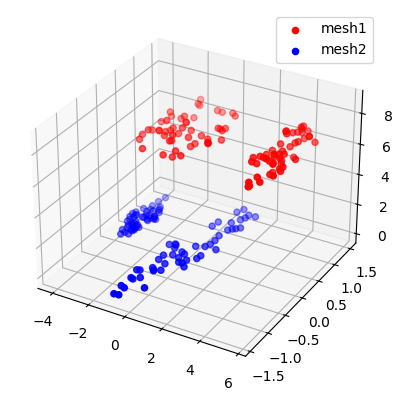

<Figure size 640x480 with 0 Axes>

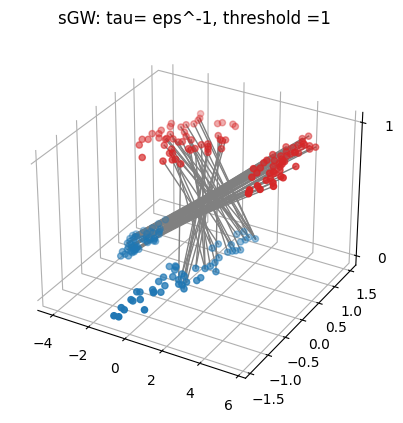

In [4]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import sgw
import scipy as sp


def generate_data(nsample, ratio):
    # Generate first ellipse
    s = np.random.uniform(size=(nsample, 3))
    x1 = np.zeros_like(s)
    x1[:, 0] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.cos(2 * np.pi * s[:, 2])
    )
    x1[:, 1] = 2 * np.sqrt(s[:, 0]) * np.sin(2 * np.pi * s[:, 1])
    x1[:, 2] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.sin(2 * np.pi * s[:, 2])
    )
    rot = 0.5 * np.sqrt(2) * np.array([[1, -1, 0], [1, 1, 0], [0, 0, 1]])
    x1 = x1.dot(rot)

    # Generate second circle
    s = np.random.uniform(size=(nsample, 3))
    x2 = np.zeros_like(s)
    x2[:, 0] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.cos(2 * np.pi * s[:, 2])
    )
    x2[:, 1] = np.sqrt(s[:, 0]) * np.sin(2 * np.pi * s[:, 1])
    x2[:, 2] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.sin(2 * np.pi * s[:, 2])
    )
    x2 = x2 + np.array([5.0, 0.0, 0.0])
    x = np.concatenate((x1, x2)) + np.array([0.0, 0.0, 8.0])

    # Generate second data drom translation
    y = np.concatenate((x1[:, :2], s[:, :2] + np.array([-4.0, 0.0])))
    angle = -np.pi / 4
    x[:nsample] = x[:nsample].dot(
        np.array(
            [
                [np.cos(angle), np.sin(angle), 0],
                [-np.sin(angle), np.cos(angle), 0],
                [0, 0, 1],
            ]
        )
    )
    y[nsample:] = (y[nsample:] - np.mean(y[nsample:], axis=0)).dot(
        np.array(
            [[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]
        )
    ) + np.mean(y[nsample:], axis=0)

    # Generate weights
    a, b = np.ones(x.shape[0]) / x.shape[0], np.ones(y.shape[0]) / y.shape[0]
    b[:n1], b[n1:] = (1 - ratio) * b[:n1], ratio * b[n1:]
    b = b / np.sum(b)
    return a, x, b, y

n1 = 50
ratio = 0.7
a, x, b, y = generate_data(n1, ratio)
x = np.array(x)
y = np.array(y)

C1 = sp.spatial.distance.cdist(x, x)
C2 = sp.spatial.distance.cdist(y, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:, 0], x[:, 1], x[:, 2], color='red', label='mesh1')
ax.scatter(y[:, 0], y[:, 1], color='blue', label='mesh2')

ax.legend()
plt.show()

P = sgw.supervised_gromov_wasserstein(C1, C2, nitermax=20, threshold=1)


def plot_mapping(P,X_1,X_2, thresh=None, linewidth=1):

    fig = plt.figure()
    
    ax = plt.axes(projection='3d') 
    ax.scatter3D(X_1[:,0], X_1[:,1], 0, c='tab:blue')
    ax.scatter3D(X_2[:,0], X_2[:,1], 1, c='tab:red')
    ax.set_title('sGW: tau= eps^-1, threshold =1')
    
    for i in range(P.shape[1]):
        if P[:,i].sum() < thresh: continue
        j = np.argmax(P[:,i])
        ax.plot3D([X_1[j,0], X_2[i,0]],[X_1[j,1], X_2[i,1]],[0,1],c='gray', linewidth=linewidth)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.set_zticks([0, 1])
    
plot_mapping(P, y, x, thresh=0.00000001)
plt.savefig('./coupling_sphere_square_1104.pdf') 




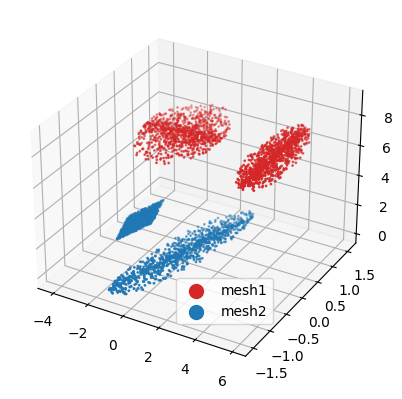

In [6]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import sgw
import scipy as sp


def generate_data(nsample, ratio):
    # Generate first ellipse
    s = np.random.uniform(size=(nsample, 3))
    x1 = np.zeros_like(s)
    x1[:, 0] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.cos(2 * np.pi * s[:, 2])
    )
    x1[:, 1] = 2 * np.sqrt(s[:, 0]) * np.sin(2 * np.pi * s[:, 1])
    x1[:, 2] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.sin(2 * np.pi * s[:, 2])
    )
    rot = 0.5 * np.sqrt(2) * np.array([[1, -1, 0], [1, 1, 0], [0, 0, 1]])
    x1 = x1.dot(rot)

    # Generate second circle
    s = np.random.uniform(size=(nsample, 3))
    x2 = np.zeros_like(s)
    x2[:, 0] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.cos(2 * np.pi * s[:, 2])
    )
    x2[:, 1] = np.sqrt(s[:, 0]) * np.sin(2 * np.pi * s[:, 1])
    x2[:, 2] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.sin(2 * np.pi * s[:, 2])
    )
    x2 = x2 + np.array([5.0, 0.0, 0.0])
    x = np.concatenate((x1, x2)) + np.array([0.0, 0.0, 8.0])

    # Generate second data drom translation
    y = np.concatenate((x1[:, :2], s[:, :2] + np.array([-4.0, 0.0])))
    angle = -np.pi / 4
    x[:nsample] = x[:nsample].dot(
        np.array(
            [
                [np.cos(angle), np.sin(angle), 0],
                [-np.sin(angle), np.cos(angle), 0],
                [0, 0, 1],
            ]
        )
    )
    y[nsample:] = (y[nsample:] - np.mean(y[nsample:], axis=0)).dot(
        np.array(
            [[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]
        )
    ) + np.mean(y[nsample:], axis=0)

    # Generate weights
    a, b = np.ones(x.shape[0]) / x.shape[0], np.ones(y.shape[0]) / y.shape[0]
    b[:n1], b[n1:] = (1 - ratio) * b[:n1], ratio * b[n1:]
    b = b / np.sum(b)
    return a, x, b, y

n1 = 1000
ratio = 0.7
a, x, b, y = generate_data(n1, ratio)
x = np.array(x)
y = np.array(y)

C1 = sp.spatial.distance.cdist(x, x)
C2 = sp.spatial.distance.cdist(y, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:, 0], x[:, 1], x[:, 2], color='tab:red', label='mesh1', s=1)  # Change size as needed
ax.scatter(y[:, 0], y[:, 1], color='tab:blue', label='mesh2', s=1)  # Change size as needed


ax.legend(fontsize=10,loc=[0.45,0.15],markerscale=10)
plt.show()




In [ ]:
#compare with other OT methods

In [ ]:
import OT
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp


def generate_data(nsample, ratio):
    # Generate first ellipse
    s = np.random.uniform(size=(nsample, 3))
    x1 = np.zeros_like(s)
    x1[:, 0] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.cos(2 * np.pi * s[:, 2])
    )
    x1[:, 1] = 2 * np.sqrt(s[:, 0]) * np.sin(2 * np.pi * s[:, 1])
    x1[:, 2] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.sin(2 * np.pi * s[:, 2])
    )
    rot = 0.5 * np.sqrt(2) * np.array([[1, -1, 0], [1, 1, 0], [0, 0, 1]])
    x1 = x1.dot(rot)

    # Generate second circle
    s = np.random.uniform(size=(nsample, 3))
    x2 = np.zeros_like(s)
    x2[:, 0] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.cos(2 * np.pi * s[:, 2])
    )
    x2[:, 1] = np.sqrt(s[:, 0]) * np.sin(2 * np.pi * s[:, 1])
    x2[:, 2] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.sin(2 * np.pi * s[:, 2])
    )
    x2 = x2 + np.array([5.0, 0.0, 0.0])
    x = np.concatenate((x1, x2)) + np.array([0.0, 0.0, 8.0])

    # Generate second data drom translation
    y = np.concatenate((x1[:, :2], s[:, :2] + np.array([-4.0, 0.0])))
    angle = -np.pi / 4
    x[:nsample] = x[:nsample].dot(
        np.array(
            [
                [np.cos(angle), np.sin(angle), 0],
                [-np.sin(angle), np.cos(angle), 0],
                [0, 0, 1],
            ]
        )
    )
    y[nsample:] = (y[nsample:] - np.mean(y[nsample:], axis=0)).dot(
        np.array(
            [[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]
        )
    ) + np.mean(y[nsample:], axis=0)

    # Generate weights
    a, b = np.ones(x.shape[0]) / x.shape[0], np.ones(y.shape[0]) / y.shape[0]
    b[:n1], b[n1:] = (1 - ratio) * b[:n1], ratio * b[n1:]
    b = b / np.sum(b)
    return a, x, b, y

n1 = 50
ratio = 0.7
a, x, b, y = generate_data(n1, ratio)
x = np.array(x)
y = np.array(y)

C1 = sp.spatial.distance.cdist(x, x)
C2 = sp.spatial.distance.cdist(y, y)

#pgw plot
m_list = [0.1, 0.3, 0.5, 0.7, 0.9, 0.9999]
PGW_list = []
for i in range(len(m_list)):
    m = m_list[i]
    P = ot.partial.entropic_partial_gromov_wasserstein(C1/C1.max(), C2/C_1.max(), a, b, 1e-1, m = m)
    PGW_list.append(P)
    plot_mapping(P, y, x, thresh=0.1/y.shape[0])
    plt.savefig("./figures/real_PGW_%d.pdf" % (i+1))
    # plt.show()
    plt.clf()